In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df = pd.read_csv("SpotifyFeatures.csv")

In [3]:
# Top five rows
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# A general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
# Shape of dataset
df.shape

(232725, 18)

In [6]:
# Checking for any null values
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
# Dropping track_id from dataset 
df.drop(columns= ['track_id'],inplace=True)

In [9]:
# General statistic of dataset
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [151]:
# Total number of unique artist_name
df['artist_name'].nunique()

14564

In [11]:
# Unique artist_name
df['artist_name'].unique()

array(['Henri Salvador', 'Martin & les fées', 'Joseph Williams', ...,
       'Dharmasoul', 'Swim', 'Jr Thomas & The Volcanos'], dtype=object)

In [152]:
# Total number of unique track_name
df['track_name'].nunique()

148614

In [13]:
# Unique track_name
df['track_name'].unique()

array(["C'est beau de faire un Show", "Perdu d'avance (par Gad Elmaleh)",
       "Don't Let Me Be Lonely Tonight", ..., 'P.O.P.', 'Burning Fire',
       "You Don't Have To Hurt No More"], dtype=object)

In [14]:
# Unique mode
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [15]:
# Unique key
df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [16]:
# Uique genre
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [17]:
# Top 10 populae song 
sorted_df = df.sort_values(by='popularity',ascending=True).head(10)
sorted_df

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",0,0.1390,0.556,150487,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,0,0.2130,0.736,212547,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,0,0.0131,0.639,184000,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,0,0.0280,0.607,147653,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404
74962,Children's Music,Children Songs Company,Woodland,0,0.9950,0.529,266067,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,0,0.2500,0.623,350080,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515
74964,Children's Music,Sing n Play,The Tortoise and the Hare,0,0.4960,0.563,201362,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370
56153,Movie,Bruno Pelletier,Lié par le sang,0,0.0294,0.656,276027,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449
74966,Children's Music,Children Songs Company,Forsaken,0,0.9940,0.429,129387,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474


In [18]:
# Popular dataset where popularity > 90
popular_df =df.query('popularity>90',inplace=False).sort_values(by='popularity',ascending=False)
popular_df[0:10]

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [20]:
# Converting duration_ms to duration_s
df['duration_s'] = df['duration_ms'].apply(lambda x: round(x/1000))

In [153]:
df.head(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s,cluster,pca1,pca2
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99,1,-1.536648,0.017769
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137,1,-1.733209,-0.724620
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170,0,1.718397,-0.105202
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152,0,1.525501,-0.798694
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83,0,2.596392,-0.065317


In [22]:
df.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
17024,Dance,Jennifer Lopez,All I Have,58,0.26500,0.699,254467,0.668,0.000000,C#,0.1410,-5.305,Major,0.1060,83.074,4/4,0.4720,254
61778,R&B,Blood Orange,Smoke - Remix,49,0.45600,0.702,280473,0.493,0.000001,F#,0.2620,-8.943,Minor,0.2670,91.047,4/4,0.4340,280
122546,Reggae,Dirty Heads,Diamonds & Pearls,52,0.00161,0.854,199995,0.619,0.000000,D,0.2010,-4.603,Major,0.0641,130.010,4/4,0.0643,200
104797,Classical,Ludwig van Beethoven,"Piano Sonata No. 30 in E Major, Op. 109: IIId....",0,0.98700,0.379,28611,0.284,0.949000,E,0.1650,-21.521,Major,0.0317,135.824,4/4,0.9610,29
151846,Pop,The National,This Is The Last Time,62,0.64400,0.499,283387,0.496,0.368000,C,0.0934,-10.246,Minor,0.0327,140.047,4/4,0.1400,283


In [24]:
# Dropping duration_ms 
df.drop(columns=['duration_ms'],inplace=True)

In [25]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83


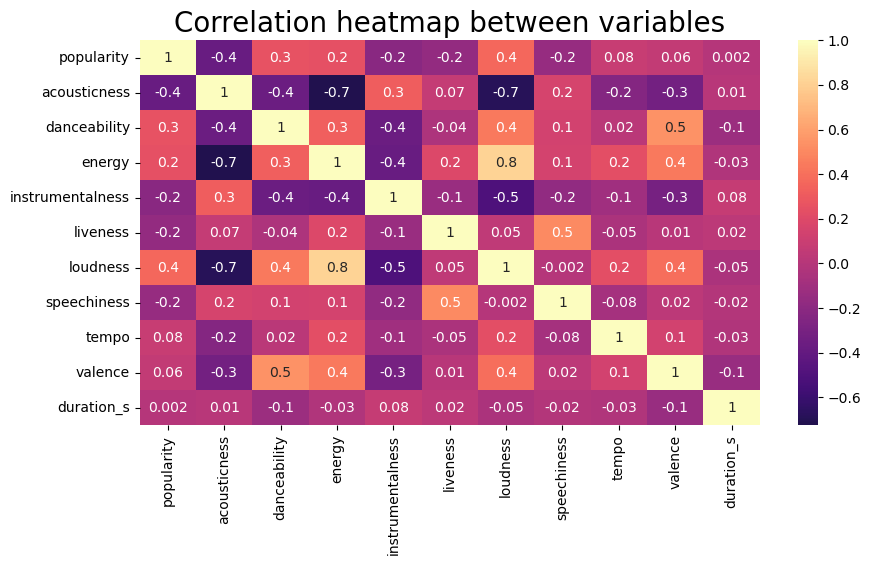

In [28]:
# correlations between different audio features
plt.figure(figsize=(10,5))
corr_df = df.drop(columns=['genre','artist_name','track_name','key','mode','time_signature'],axis=1).corr(method='pearson')
sns.heatmap(data=corr_df,annot=True,fmt='.1g',center=0,cmap='magma')
plt.title("Correlation heatmap between variables",size=20)
plt.show()

In [29]:
# Taking only 0% data from whole dataset
sample_df = df.sample(int(0.004*len(df)))

In [30]:
len(sample_df)

930

Text(0.5, 1.0, 'Correlation bewteen loudness vs Energy')

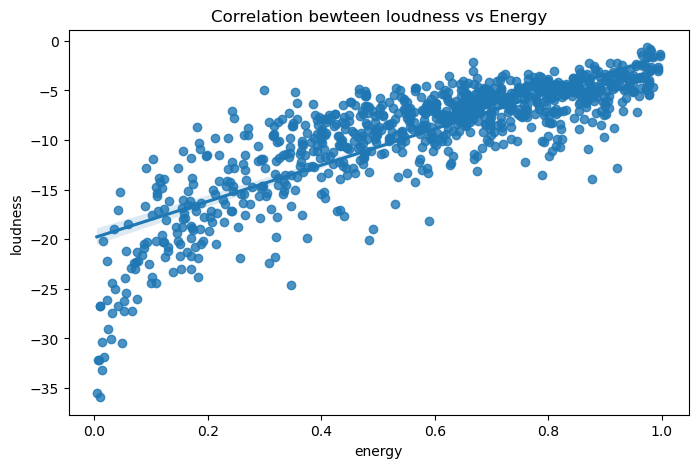

In [31]:
# Relation bewteen loudness vs Energy
plt.figure(figsize=(8,5))
sns.regplot(data=sample_df, y= 'loudness', x = 'energy')
plt.title("Correlation bewteen loudness vs Energy")

Text(0.5, 1.0, 'Correlation bewteen Popularity vs Acousticness')

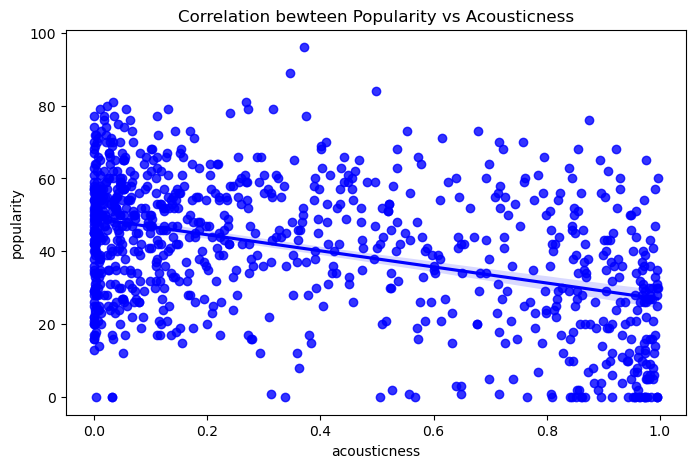

In [33]:
# Relation bewteen Popularity vs Acousticness
plt.figure(figsize=(8,5))
sns.regplot(data=sample_df, y= 'popularity', x = 'acousticness',color='b')
plt.title("Correlation bewteen Popularity vs Acousticness")

Text(0.5, 1.0, 'Correlation bewteen Danceability vs Valence')

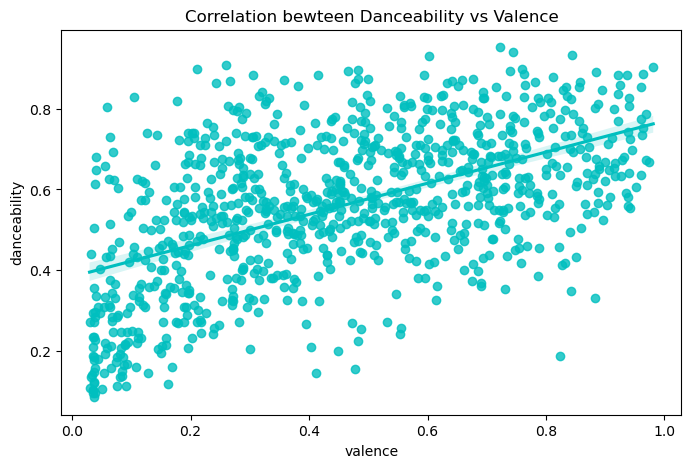

In [34]:
# Relation bewteen Danceability vs Valence
plt.figure(figsize=(8,5))
sns.regplot(data=sample_df, y= 'danceability', x = 'valence',color='c')
plt.title("Correlation bewteen Danceability vs Valence")

Text(0.5, 1.0, 'Correlation bewteen valence vs danceability')

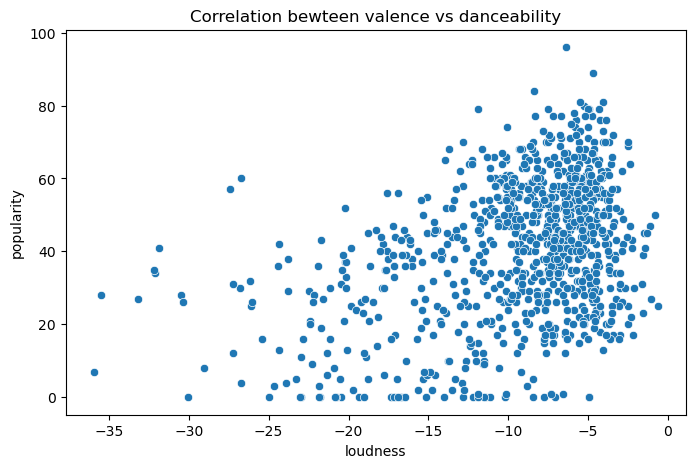

In [35]:
# Relation bewteen valence vs danceability
plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, y= 'popularity', x = 'loudness')
plt.title("Correlation bewteen valence vs danceability")

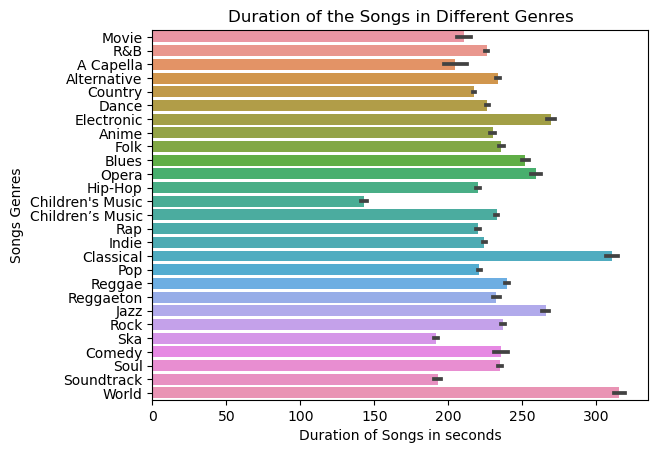

In [36]:
# Duration of the Songs in Different Genres
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(data = df, y = 'genre', x = 'duration_s')
plt.xlabel("Duration of Songs in seconds")
plt.ylabel("Songs Genres")
plt.show()

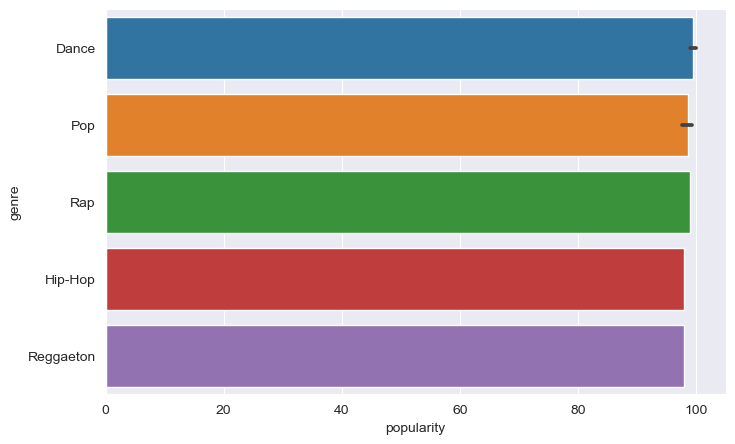

In [59]:
# Plot between Popularity vs Genre
sns.set_style(style = 'darkgrid')
plt.figure(figsize=(8,5))
famous = df.sort_values('popularity',ascending=False).head(10)
sns.barplot(data=famous,y='genre',x='popularity')
plt.show()

<Axes: xlabel='popularity', ylabel='Count'>

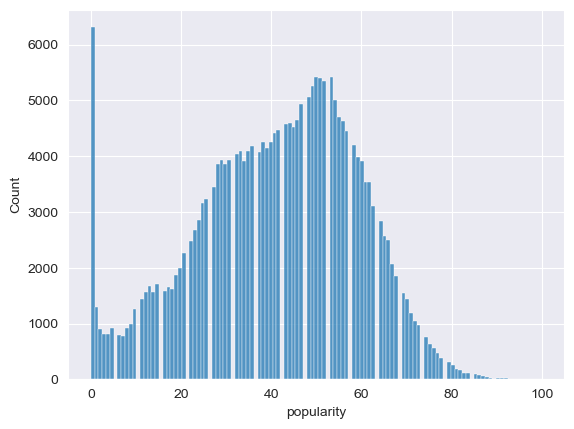

In [51]:
# Distribution of popularity column
sns.histplot(df['popularity'])

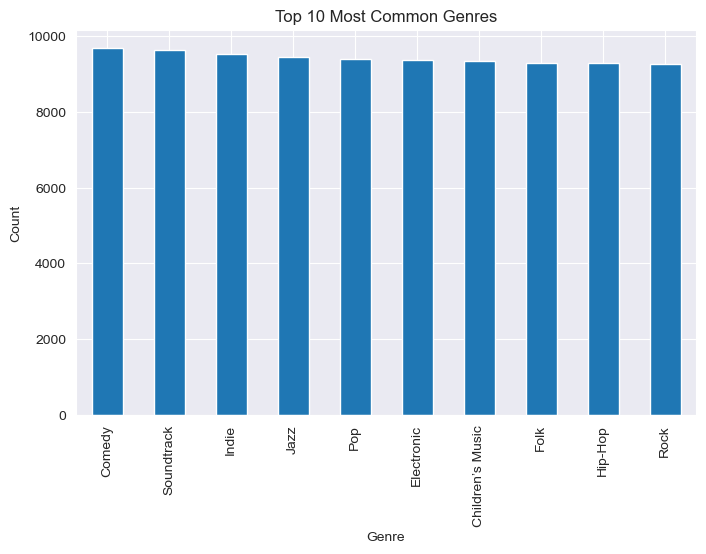

In [68]:
# Genres are most common in the dataset
plt.figure(figsize=(8, 5))
gernre_count = df['genre'].value_counts()
gernre_count.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [73]:
# Average values for acousticness, danceability, and energy across different genres
df_mean = df.groupby("genre")[['acousticness','danceability','energy']].mean()
print(df_mean)

                  acousticness  danceability    energy
genre                                                 
A Capella             0.829941      0.412252  0.250313
Alternative           0.162313      0.541898  0.711519
Anime                 0.286843      0.472090  0.665356
Blues                 0.327840      0.528232  0.606171
Children's Music      0.591781      0.697475  0.396880
Children’s Music      0.163175      0.541843  0.706616
Classical             0.868843      0.305958  0.177984
Comedy                0.793098      0.559038  0.676094
Country               0.270172      0.577038  0.636318
Dance                 0.152888      0.638191  0.698067
Electronic            0.119839      0.619542  0.739299
Folk                  0.463201      0.527276  0.491733
Hip-Hop               0.176172      0.718808  0.643275
Indie                 0.331214      0.566821  0.581002
Jazz                  0.499606      0.585638  0.472776
Movie                 0.697341      0.491186  0.370703
Opera     

In [76]:
# Count the occurrences of each genre in the genre column.
genre_count = df['genre'].value_counts().to_frame()
print(genre_count)

                  count
genre                  
Comedy             9681
Soundtrack         9646
Indie              9543
Jazz               9441
Pop                9386
Electronic         9377
Children’s Music   9353
Folk               9299
Hip-Hop            9295
Rock               9272
Alternative        9263
Classical          9256
Rap                9232
World              9096
Soul               9089
Blues              9023
R&B                8992
Anime              8936
Reggaeton          8927
Ska                8874
Reggae             8771
Dance              8701
Country            8664
Opera              8280
Movie              7806
Children's Music   5403
A Capella           119


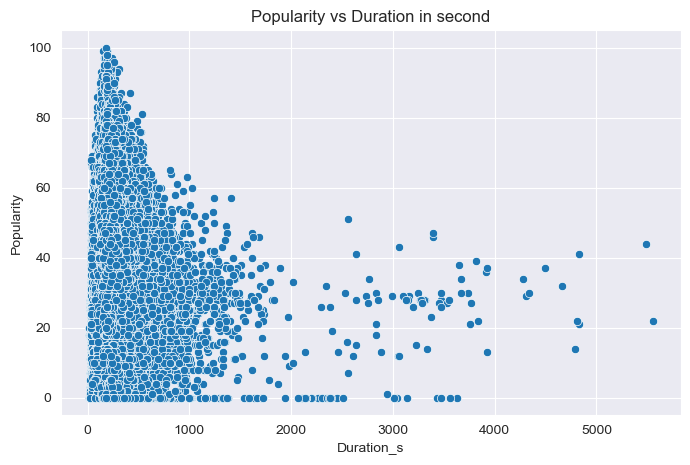

In [111]:
# Plot popularity against duration_ms to see if there’s any trend.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='duration_s',y='popularity')
plt.xlabel("Duration_s")
plt.ylabel("Popularity")
plt.title("Popularity vs Duration in second",)
plt.show()

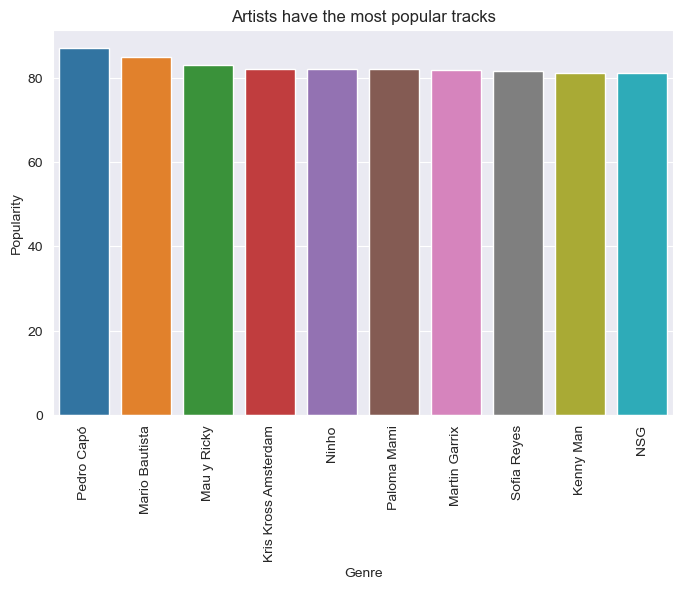

In [110]:
# Artists have the most popular tracks
plt.figure(figsize=(8,5))
artist_df = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=artist_df.head(10),x='artist_name',y='popularity')
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.title("Artists have the most popular tracks")
plt.show()

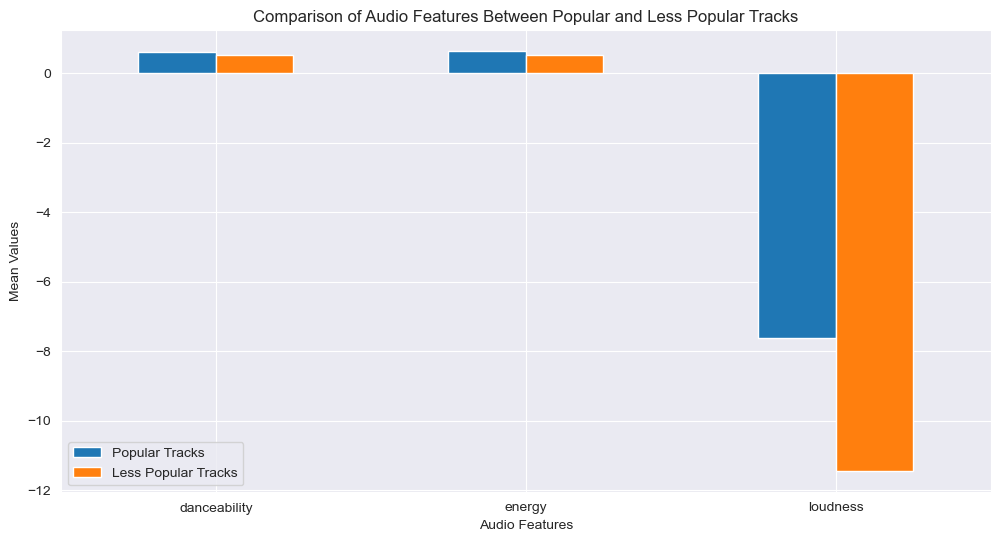

In [128]:
# Compare audio features of popular tracks to less popular tracks
popularity_threshold = 43.0
popular_track = df[df['popularity']>popularity_threshold]
less_popular_track = df[df['popularity']<=popularity_threshold]

features = ['danceability', 'energy', 'loudness']
popular_means = popular_track[features].mean()
less_popular_means = less_popular_track[features].mean()

comparison_df = pd.DataFrame({
    'Popular Tracks': popular_means,
    'Less Popular Tracks': less_popular_means
})

comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Audio Features Between Popular and Less Popular Tracks')
plt.xlabel('Audio Features')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.show()

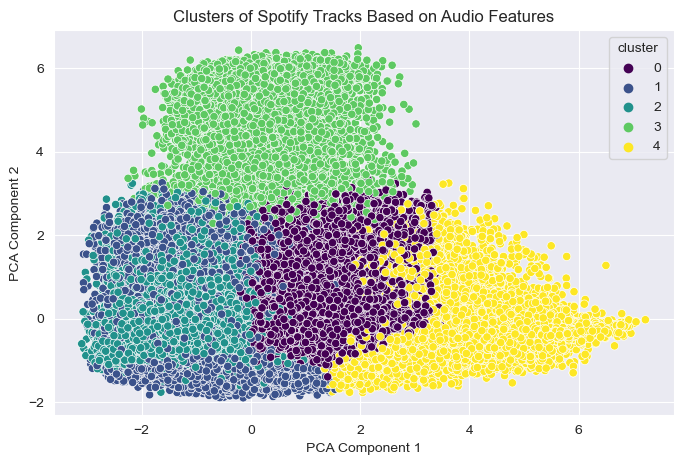

In [147]:
# Cluster tracks based on their audio features

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Spotify Tracks Based on Audio Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

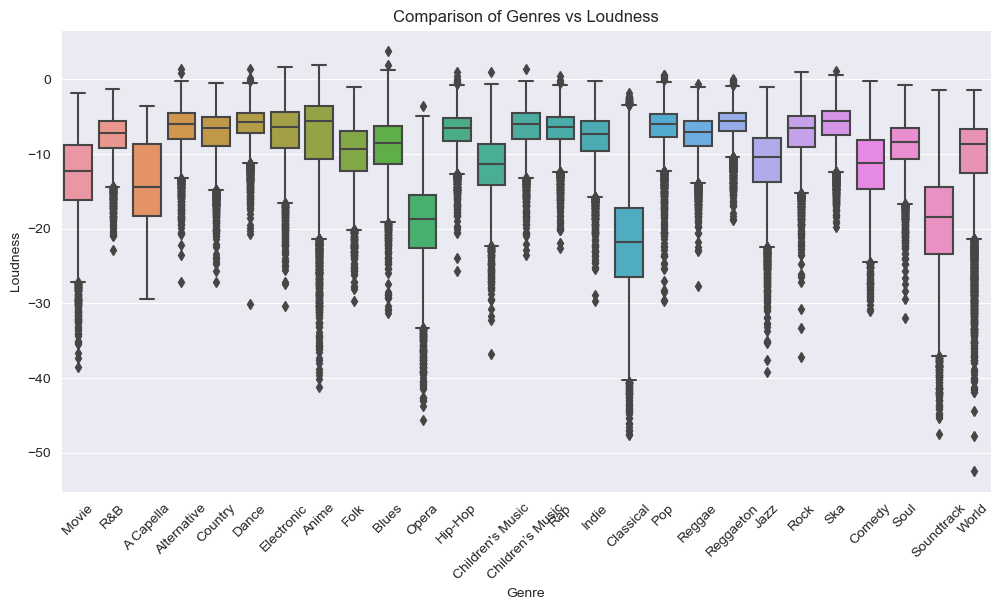

In [143]:
# Compare different genres vs loudness
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='loudness', data=df)
plt.title('Comparison of Genres vs Loudness')
plt.xlabel('Genre')
plt.ylabel('loudness'.capitalize())
plt.xticks(rotation=45)
plt.show()

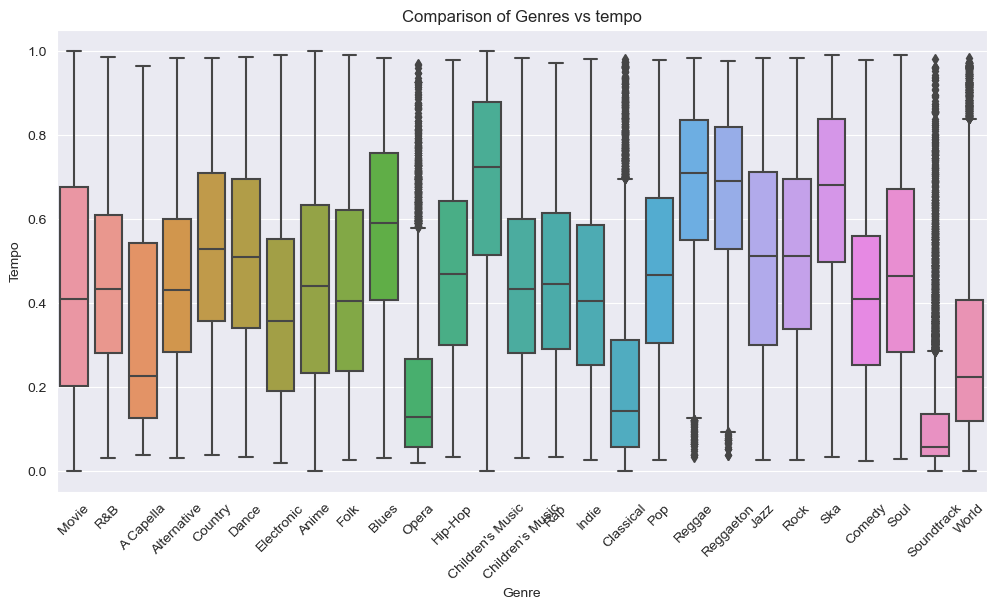

In [142]:
# Compare different genres vs tempo
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y=feature, data=df)
plt.title('Comparison of Genres vs tempo')
plt.xlabel('Genre')
plt.ylabel('tempo'.capitalize())
plt.xticks(rotation=45)
plt.show()

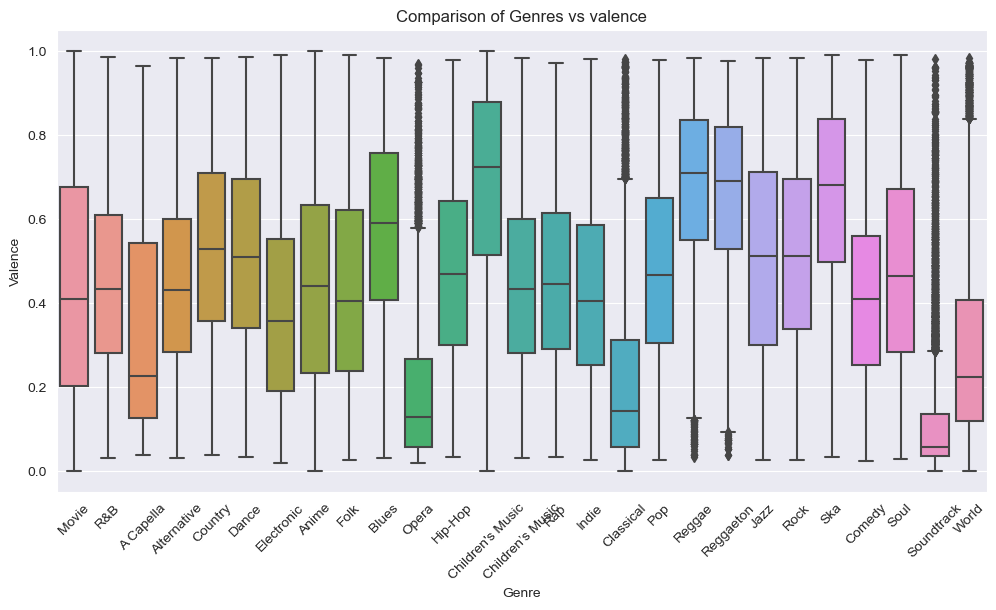

In [141]:
# Compare different genres vs valence
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='valence', data=df)
plt.title('Comparison of Genres vs valence')
plt.xlabel('Genre')
plt.ylabel('valence'.capitalize())
plt.xticks(rotation=45)
plt.show()